In [1]:
import pandas as pd
import pickle
import os 

import matplotlib.pyplot as plt
import seaborn as sns

# Copula is generally good for distributing synthetic data
from copulas.univariate import GaussianKDE
from copulas.multivariate import GaussianMultivariate

# Tensorflow is a specialty library for ANN
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

2024-12-18 11:40:36.855234: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734514837.005402  135603 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734514837.051556  135603 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-18 11:40:37.362275: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('training_set_timed.csv').drop(columns=['Unnamed: 0'])
data

,person,object,speed,frames,time
0,11.302885,0.283654,1.403075,208.000000,13.483680
1,1.140000,0.560000,2.374617,50.000000,1.450127
2,1.943329,0.741440,0.669307,847.000000,9.794604
3,1.000863,1.316652,0.796265,1159.000000,24.911718
4,2.747253,0.957418,1.098094,728.000000,8.418502
...,...,...,...,...,...
578,1.621562,1.410311,3.272560,233.012141,15.105102
579,8.119008,0.194636,1.916637,1332.070054,43.476693
580,2.548283,1.262452,0.918473,1180.106068,25.365375
581,1.009013,0.807948,0.710550,328.940065,21.323667


In [3]:
# Usual splitting
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.3, random_state=42)

# Simple Scaling
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [11]:
model = Sequential()
# 1st Hidden layer
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization()) # Batch Normalization reduces overfitting and improves performance
model.add(Dropout(0.1)) # Dropout layers help prevent overfitting
# 2nd Hidden layer
model.add(Dense(512, input_dim=X_train.shape[1], activation='tanh')) # introduce some non-linearity to the system
model.add(BatchNormalization())
model.add(Dropout(0.1))
# 3rd Hidden layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# 4th Hidden layer
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu')) # introduce some non-linearity to the system
model.add(BatchNormalization())
model.add(Dropout(0.1))
# Output layer
model.add(Dense(1))

model.compile(optimizer=Adam(), loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

/home/admin1997/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 3433.8159 - val_loss: 566.4320
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2636.6504 - val_loss: 550.6750
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1546.3657 - val_loss: 539.3834
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2884.2124 - val_loss: 527.4875
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2810.9624 - val_loss: 534.1448
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1895.7230 - val_loss: 539.3905
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1687.1393 - val_loss: 546.1811
Epoch 8/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2203.7400 - val_loss: 549.2820
Epoch 9/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1302.3956 - val_loss: 532.9775
Epoch 10/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1755.8267 - val_loss: 517.2302
Epoch 11/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1333.8547 - val_loss: 525.7988
Epoch 12

In [13]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step 
Mean Squared Error: 164.65590868505723
R2 Score: 0.8886322750608942


In [14]:
# I could have been better with various adjustments...

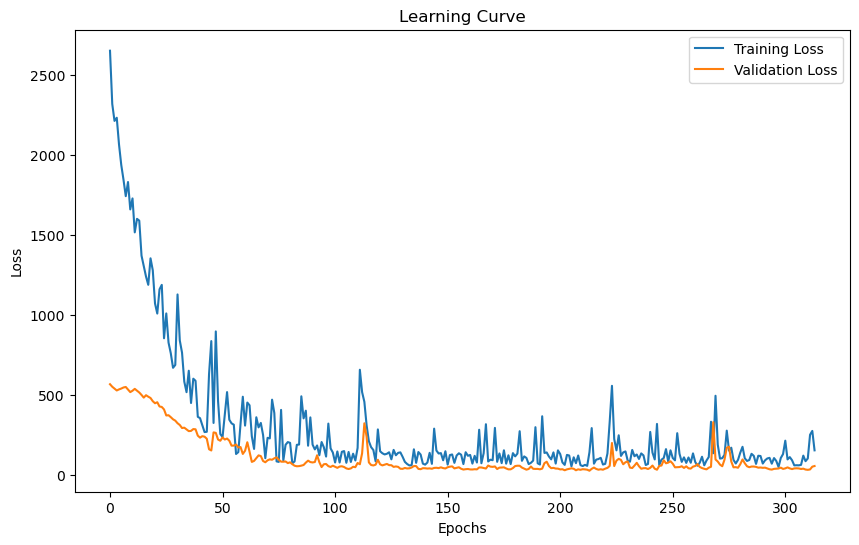

In [15]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
# The model did pretty well according to the R2 score. The learning curve shows us that it still has some difficulty aligning 
# the validation and the training loss.
# All things considered (hardware shortage), it did pretty well.

# We also know that our dataset is not ruled by linear relationships. On the ML production notebook we found the models that best describe our data to be non-linear.
# This non-linearity promotes the use of ANNs.

In [24]:
# Lets attempt the same procedure but this time we will augment our data with copula library


X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.3, random_state=42)

# sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

synthesizer = GaussianMultivariate()
synthesizer.fit(data)

synthetic_data = synthesizer.sample(num_rows=len(data))

synthetic_data

/home/admin1997/miniconda3/envs/tensorflow/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/admin1997/miniconda3/envs/tensorflow/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
/home/admin1997/miniconda3/envs/tensorflow/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/admin1997/miniconda3/envs/tensorflow/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0)

,person,object,speed,frames,time
0,1.865439,1.876711,1.032722,676.162266,9.968274
1,0.122873,1.767160,0.644468,146.042704,4.638934
2,6.477931,1.610920,1.341337,167.944928,3.673253
3,0.709923,0.377090,1.185608,964.626734,10.984742
4,3.827100,1.052499,0.693288,512.048691,8.186481
...,...,...,...,...,...
578,4.400666,0.474264,0.920079,569.328699,16.418632
579,1.478267,1.108141,0.726694,299.066299,13.015473
580,2.497437,1.512343,0.593539,344.785842,22.795197
581,0.963614,4.301694,0.828855,275.143226,8.176109


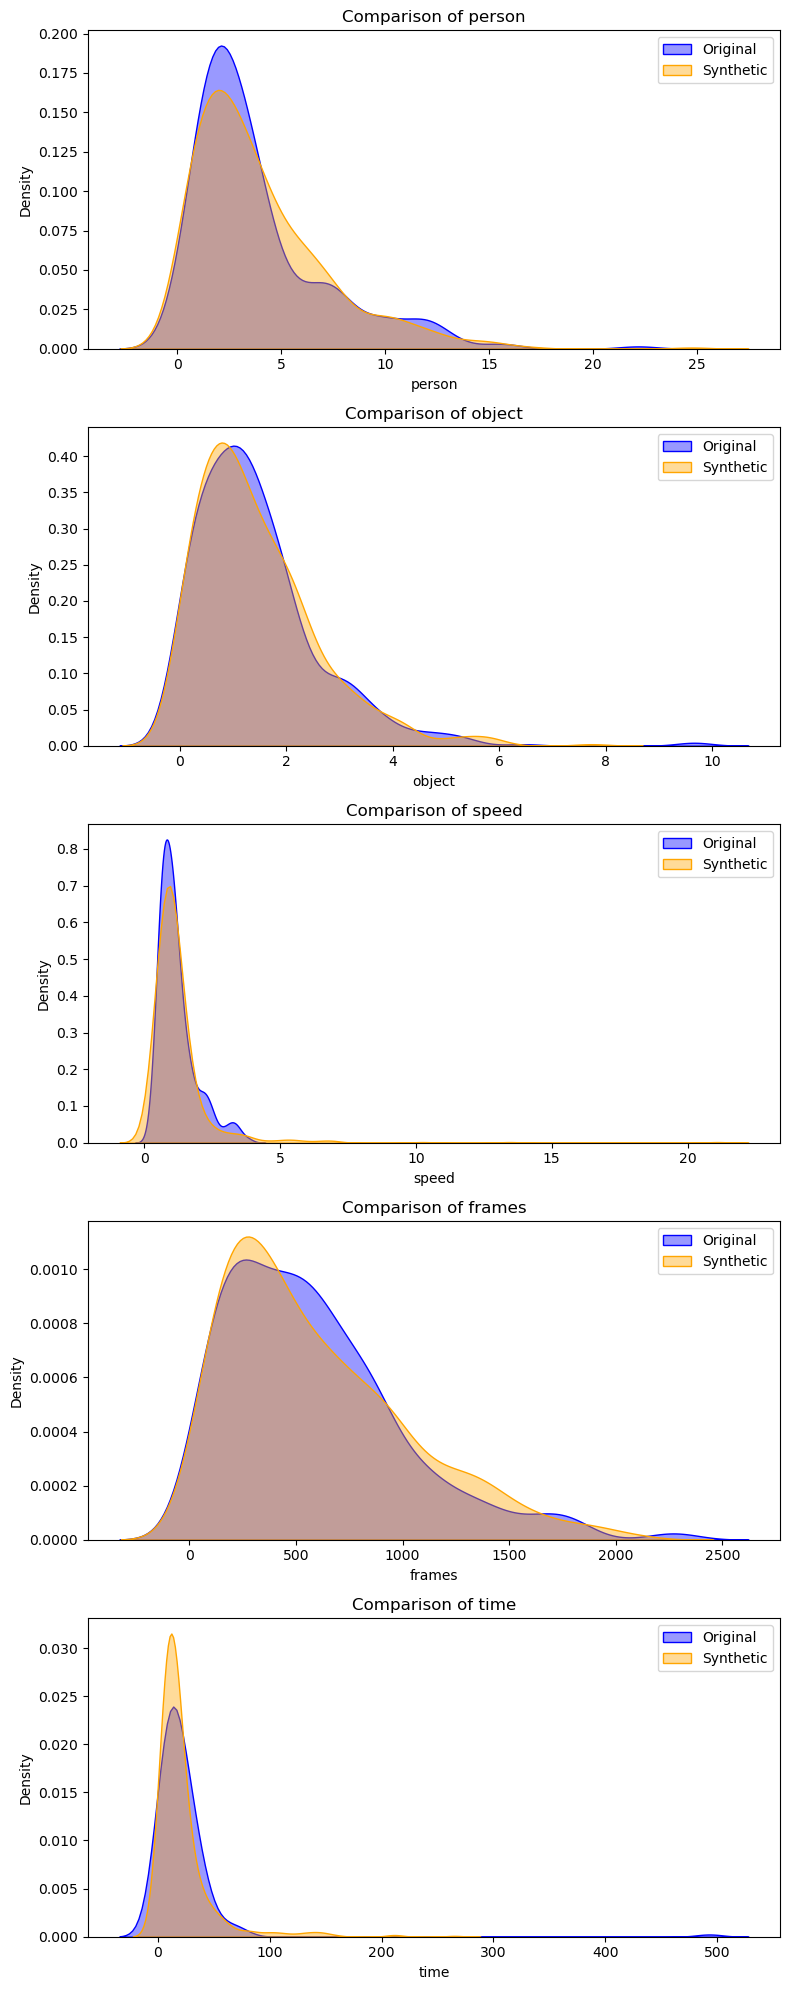

In [25]:
# We have and extra dataset we can explore and tailor to our needs.

features = data.columns
fig, axes = plt.subplots(len(features), 1, figsize=(8, 4 * len(features)))

for i, feature in enumerate(features):
    ax = axes[i]
    
    # Plot original data
    sns.kdeplot(data[feature], ax=ax, label='Original', color='blue', fill=True, alpha=0.4)
    
    # Plot synthetic data
    sns.kdeplot(synthetic_data[feature], ax=ax, label='Synthetic', color='orange', fill=True, alpha=0.4)
    
    # Set titles and labels
    ax.set_title(f"Comparison of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")RandomForestRegressor...
    ax.legend()


plt.tight_layout()
plt.show()


In [26]:
# We see that the data in the dataset and the synthetic set are similar enough (overlapping of areas)

new_data = pd.concat([data, synthetic_data], ignore_index=True, axis=0)
new_data

,person,object,speed,frames,time
0,11.302885,0.283654,1.403075,208.000000,13.483680
1,1.140000,0.560000,2.374617,50.000000,1.450127
2,1.943329,0.741440,0.669307,847.000000,9.794604
3,1.000863,1.316652,0.796265,1159.000000,24.911718
4,2.747253,0.957418,1.098094,728.000000,8.418502
...,...,...,...,...,...
1161,4.400666,0.474264,0.920079,569.328699,16.418632
1162,1.478267,1.108141,0.726694,299.066299,13.015473
1163,2.497437,1.512343,0.593539,344.785842,22.795197
1164,0.963614,4.301694,0.828855,275.143226,8.176109


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_data.iloc[:, :-1], new_data.iloc[:, -1], test_size=0.3, random_state=42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
# Lets make a model similar to the previous but a bit different

model = Sequential()
# 1st Hidden layer
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization()) 
model.add(Dropout(0.1)) 
# 2nd Hidden layer
model.add(Dense(512, input_dim=X_train.shape[1], activation='tanh')) 
model.add(BatchNormalization())
# model.add(Dropout(0.1)) # Remove one dropout layer
# 3rd Hidden layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# 4th Hidden layer
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu')) # introduce some non-linearity to the system
model.add(BatchNormalization())
# model.add(Dropout(0.1)) # Remove one more layer

# 5th Hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) # introduce some non-linearity to the system
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
# Output layer
model.add(Dense(1))

model.compile(optimizer=Adam(), loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

/home/admin1997/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 1859.1382 - val_loss: 381.1336
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2453.8416 - val_loss: 321.7850
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1850.6128 - val_loss: 309.1277
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3117.2927 - val_loss: 312.7188
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1702.6025 - val_loss: 297.2487
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2302.4927 - val_loss: 374.4647
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2089.0413 - val_loss: 348.2946
Epoch 8/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2358.0398 - val_loss: 418.1750
Epoch 9/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2678.4143 - val_loss: 445.6958
Epoch 10/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3154.2622 - val_loss: 445.3997
Epoch 11/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3178.6055 - val_loss: 419.8716
Epoch 12

In [41]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step 
Mean Squared Error: 254.87937282660215
R2 Score: 0.8276081550167848


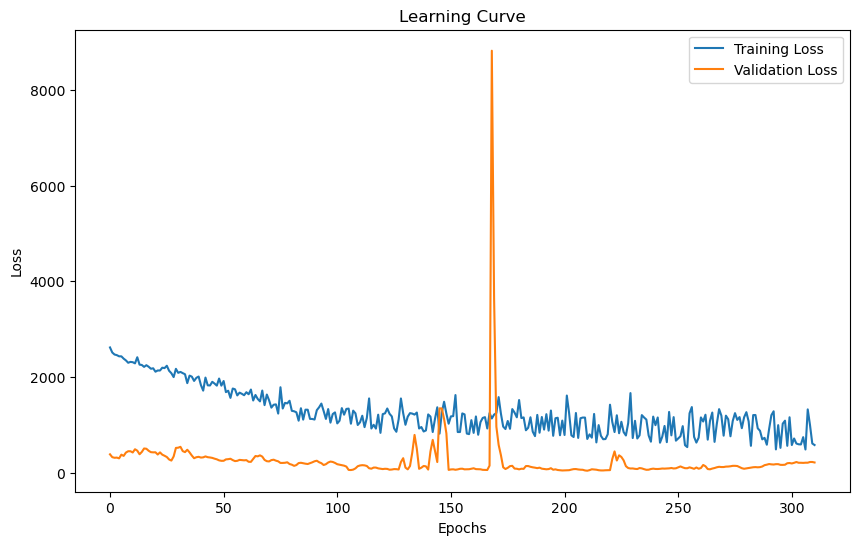

In [42]:
# R2 score tells us we have a decent fit. Again, multiple adjustments could bring better results.
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# We explored data augmentation in this chapter with a simple yet robust library.
# Other libraries include CTGAN for tabular data, SMOTE for categorical data and more.
# ANN production requires serious resources most of the time.
# Fine tuning of an ANN can include kfold validation and grid search.